In [94]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_sanders = np.genfromtxt('data_sanders_downsampled.csv', delimiter=',')
data_clinton = np.genfromtxt('data_clinton_downsampled.csv', delimiter=',')
data_trump = np.genfromtxt('data_trump_downsampled.csv', delimiter=',')
data_cruz = np.genfromtxt('data_cruz_downsampled.csv', delimiter=',')

In [71]:
mean_sanders = np.nanmean(data_sanders[:,1])
mean_clinton = np.nanmean(data_clinton[:,1])
mean_trump = np.nanmean(data_trump[:,1])
mean_cruz = np.nanmean(data_cruz[:,1])

In [95]:
import math
def wmean(data):
    temp = []
    total_tweets = 0
    for x in data[1:]:
        if not math.isnan(x[1]):
            temp.append(x[1]*x[2])
            total_tweets += x[2]
    return np.sum(temp)/total_tweets

In [77]:
mean_sanders = wmean(data_sanders)
mean_clinton = wmean(data_clinton)
mean_trump = wmean(data_trump)
mean_cruz = wmean(data_cruz)

In [75]:
print mean_sanders
print wmean_sanders

0.0754757175582
0.0903755924953


In [84]:
stds = [np.nanstd(data_sanders[:,1]), np.nanstd(data_trump[:,1]), np.nanstd(data_clinton[:,1]), np.nanstd(data_cruz[:,1])]

In [97]:
from scipy.stats import sem
from math import isnan
def nansem(x):
    x = [y for y in x if not isnan(y)]
    return sem(x)

In [98]:
datas = [data_sanders, data_trump, data_clinton, data_cruz]

In [99]:
sems = []
for d in datas:
    sems.append(nansem(d[:,1]))

In [100]:
sems

[0.001951862012786251,
 0.0011622292964955907,
 0.0012230704868993129,
 0.0020050743324795612]

In [118]:
import scipy as sp
import scipy.stats
from math import isnan

def mean_confidence_interval(data, confidence=0.95):
    data = [d for d in data if not isnan(d)]
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t.ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

def mean_confidence_interval_size(data, confidence=0.95):
    data = [d for d in data if not isnan(d)]
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t.ppf((1+confidence)/2., n-1)
    return h

In [119]:
conf_intervals = []
for d in datas:
    conf_intervals.append(mean_confidence_interval_size(d[:,1]))
print np.array(conf_intervals)

[ 0.00382917  0.00228001  0.00239943  0.00393364]


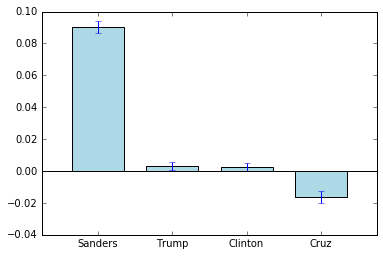

In [120]:
width = 0.7
ind = np.arange(4)+width*2
fig, ax = plt.subplots()
ax.bar(ind, [mean_sanders, mean_trump, mean_clinton, mean_cruz], width=width, yerr=conf_intervals, color='lightblue')
ax.set_xticks(ind+width*0.5)
ax.set_xticklabels(['Sanders', 'Trump', 'Clinton', 'Cruz'])
plt.axhline(y=0, c='black')
# ax.set_ylim([-0.5,0.5])
plt.show()